# Module 2 - Temporal Dynamics


## Creators
- Caterina Ceccato
- Ethel Pruss
- Jos Prinsen
- Anita Vrins (Snr. 2023288)

## Introduction

This module makes use of a dataset which reports on participants *EEG Engagement Index* (Pope et al., 1995) during a listening task.

The dataset is divided in two conditions: 
- **Adaptive**: Where a social robot performed a gesture when it noticed a drop in EEG Engagement
- **Random**: Where the same social robot performed a gesture at random times


The index was calculated using Welch's method, with sliding windows of 1 second and no overlap.
The original signal was approximately 5 minutes with a sampling rate of 250 Hz. The EEG Engagement dataset contains approximately 500 timepoints per participant.

## Contents:

- Section 1: What are the temporal signatures of the signal?
- Section 2: Are the signals stationary?
- Section 3: Can we differentiate measurement error?
- Section 4: What are the effects of up-and down-sampling on the temporal signatures?



# Section 1: What are the temporal signatures of the signal?

### 1.1 File loading

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.signal import find_peaks
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

In [2]:

pathRandom = "C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\EngagementCSV_1sec\\Random"
pathAdaptive = "C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\EngagementCSV_1sec\\Adaptive"


In [3]:
flistRandom = []
flistAdaptive = []

for i in os.listdir(pathRandom):
    if 'Engagement_1sec' in i:
        flistRandom.append(i)
        
        
for i in os.listdir(pathAdaptive):
    if 'Engagement_1sec' in i:
        flistAdaptive.append(i)
        
print(len(flistRandom))
print(len(flistAdaptive))


39
39


In [29]:
def getParticipant(num, condition):
    
    if condition == "Adaptive":
        current = pd.read_csv(str(pathAdaptive + '\\' +  flistAdaptive[num-1]))
    elif condition == "Random":
        current = pd.read_csv(str(pathRandom +'\\'+ flistRandom[num-1]))

    else:
        return "Error"
    
    return current


### 1.2 Visualizing participant 1

In [182]:

p1_adaptive = getParticipant(0,"Adaptive") 
p1_random = getParticipant(0,"Random") 


Text(0, 0.5, 'EEG Engagement Index')

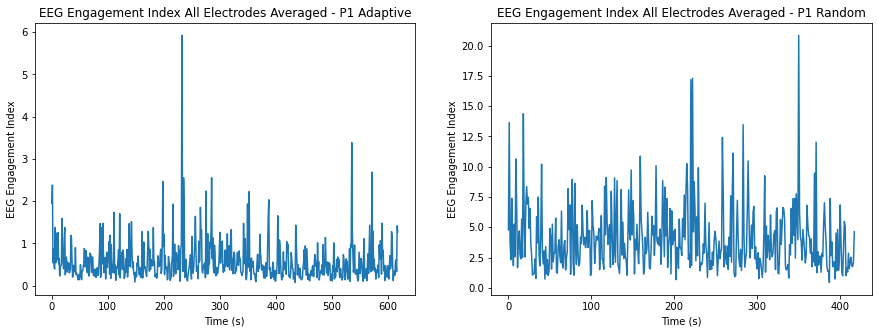

In [183]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.plot(p1_adaptive['Total'])
plt.title('EEG Engagement Index All Electrodes Averaged - P1 Adaptive')
plt.xlabel('Time (s)')
plt.ylabel('EEG Engagement Index')

plt.subplot(1,2,2)
plt.plot(p1_random['Total'])
plt.title('EEG Engagement Index All Electrodes Averaged - P1 Random')
plt.xlabel('Time (s)')
plt.ylabel('EEG Engagement Index')


As can be seen in the two plots, the duration of the two conditions was different. 
Additionally, the EEG engagement index seems to fluctuate between 0 and 25.

### Q1: The type of change seems to be **deterministic chaos / third order change**. 

# Section 2:  Are the signals stationary?

## Contents: 
- Variance testing
- Mean test for two equal halves of the signal
- Autocorrelation testing
- Test for all participants

### 2.1 Testing for P1 - Adaptive

#### 2.2.1 Dividing the signal into two equal halves

In [184]:
length = len(p1_adaptive)

seq1 = p1_adaptive['Total'][0:length//2]
seq2 = p1_adaptive['Total'][length//2:]


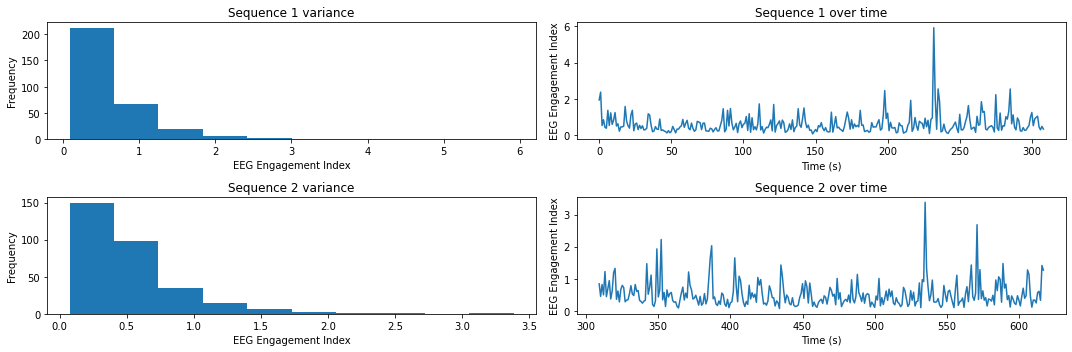

In [185]:
plt.figure(figsize = (15,5))

plt.subplot(2,2,1)
plt.hist(seq1)
plt.title('Sequence 1 variance')
plt.xlabel('EEG Engagement Index')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.plot(seq1)
plt.title('Sequence 1 over time')
plt.xlabel('Time (s)')
plt.ylabel('EEG Engagement Index')


plt.subplot(2,2,3)
plt.hist(seq2)
plt.title('Sequence 2 variance')
plt.xlabel('EEG Engagement Index')
plt.ylabel('Frequency')


plt.subplot(2,2,4)
plt.plot(seq2)
plt.title('Sequence 2 over time')
plt.xlabel('Time (s)')
plt.ylabel('EEG Engagement Index')

plt.tight_layout()

#### 2.2.2 Descriptive statistics

In [186]:
print('Mean Adaptive seq1: ', np.mean(seq1))
print('Variance Adaptive seq1: ', np.std(seq1))

print('\n')

print('Mean Adaptive seq2: ', np.mean(seq2))
print('Variance Adaptive seq2: ', np.std(seq2))



Mean Adaptive seq1:  0.6252999662745523
Variance Adaptive seq1:  0.5394209138203775


Mean Adaptive seq2:  0.5216949769369922
Variance Adaptive seq2:  0.40539566241440456


#### 2.2.3 Checking for variance / levene test

In [187]:
from scipy.stats import levene
stat, p = levene(seq1, seq2)
print('Levene test p value: ', p)


Levene test p value:  0.06683444907716318


- The outcome from the Levene test suggests that the **two halves of the signal have an equal variance**

#### 2.2.3 Checking mean of two halves of signal

In [36]:
stat, p = stats.ttest_ind(a=seq1, b=seq2, equal_var=True)
print('Two sample T-test p value: ', p)

Two sample T-test p value:  9.352288411519394e-06


- This result suggests that the **mean of the signal is different** over the duration of the Adaptive condition for P1

#### 2.2.4 Checking autocorrelation within condition

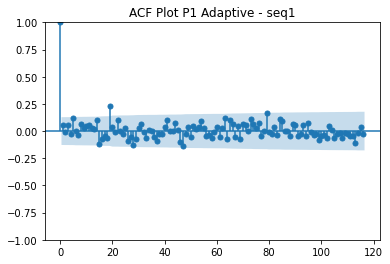

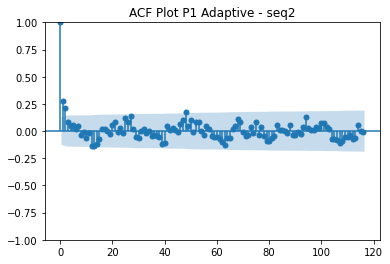

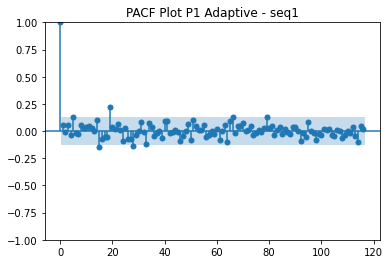

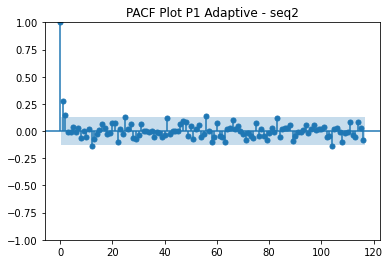

In [85]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa


maxlag = length//4-1 # Half of the signal, half of the sample

plot_acf(seq1, lags=maxlag);
plt.title('ACF Plot P1 Adaptive - seq1')
plt.show()


plot_acf(seq2, lags=maxlag);
plt.title('ACF Plot P1 Adaptive - seq2')
plt.show()


plot_pacf(seq1, lags=maxlag, method='ywm')
plt.title('PACF Plot P1 Adaptive - seq1')
plt.show()


plot_pacf(seq2, lags=maxlag, method='ywm')
plt.title('PACF Plot P1 Adaptive - seq2')
plt.show()




- Based on these plots we can see that the **autocorrelation pattern is similar within the condition**  and there are no significant valleys or peaks



#### 2.2.4 Checking autocorrelation over full condition

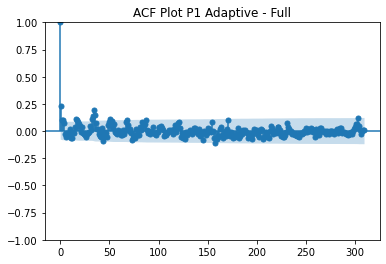

In [234]:
plot_acf(p1_adaptive['Total'], lags=length//2);
plt.title('ACF Plot P1 Adaptive - Full')
plt.show()


- There seems to be a significant peak between the 0 and 50 lags, the next code section detects the significant peaks to be at 1 and 34 lags

In [235]:
def getPeaks(data):
    
    peaklist = [] 
    autocorr = tsa.acf(data, nlags = length//2)   
    
    acf_significant = (np.abs(autocorr[1:]) > (1.96 / np.sqrt(len(x))))
    acf_lags = np.where(acf_significant)[0] + 1
    
    peaklist.append(acf_lags) 
    peaklist = np.array(peaklist)
    
    return peaklist.flatten()

print('Significant lag peaks: ', getPeaks(p1_adaptive['Total']))


Significant lag peaks:  [ 1 34]


- The fact that the **ACF peaks are at 1 and 34** is an interesting finding and could have to do with the pace of the robot speaking or potentially the participants workload being somewhat periodic


- Further in this notebook the peaks for all participants will be stored in a dataframe, then we can see if there are certain ACF peaks that overlap with multiple participants

#### 2.2.5  Stationarity testing for all participants (Adaptive)

- The following analysis repeats the previous steps, splitting each signal in two parts to **determine stationarity for all participants in the dataset**
- The results are compiled in a dataframe at the end

In [236]:
def testVariance(p, condition):
    
    participant = getParticipant(p, condition)
    
    var = False
    
    length = len(participant['Total'])

    seq1 = participant['Total'][0:length//2]
    seq2 = participant['Total'][length//2:]
    
   
    stat, p = levene(seq1, seq2)
    if p <= 0.05:  
        var = False
          
    else:
        var = True
            
    return p, var


In [259]:
def getMean(p, condition ):
    
    mean = False
    var = False
    direction = "No difference"
    
    participant = getParticipant(p, condition)
    length = len(participant['Total'])

    seq1 = participant['Total'][0:length//2]
    seq2 = participant['Total'][length//2:]
    
    
    pval, var = testVariance(p,condition)
    
    #Equal variance = True
    if var == True:
        stat, pval = stats.ttest_ind(a=seq1, b=seq2, equal_var=True)
              
    #Equal variance = false
    else:
        stat, pval = stats.ttest_ind(a=seq1, b=seq2, equal_var=False)
        
    if pval <= 0.05:  
        mean = False
        
    else:
        mean = True
        
    if (mean == False) and (np.mean(seq1) > np.mean(seq2)):
        direction = "Lower"
        
    elif (mean ==False) and (np.mean(seq1) < np.mean(seq2)):
        direction = "Higher"
        
    return pval, mean, direction


In [273]:
condition = 'Adaptive'

varlist = []
pvarlist = []

meanlist = []
pmeanlist = []
directions = []

acf_peaklist = []
pacf_peaklist = []


for i in range(len(flistRandom)):
    p, var = testVariance(i, condition)
    varlist.append(var)
    pvarlist.append(p)
    
      
for i in range(len(flistRandom)):
    p, mean, direction = getMean(i, condition)
    meanlist.append(mean)
    pmeanlist.append(p)
    directions.append(direction)
    
for i in range(len(flistRandom)):
    
    current = getParticipant(i,condition)    
    full = getPeaks(current['Total'])
    
    acf_peaklist.append(full)
    

In [274]:
df = pd.DataFrame({ 'Mean_Stationarity' : meanlist, 'p_ttest' : pmeanlist, 'Direction_Change' : directions,  
                   'Variance_Stationarity' : varlist, 'p_Variance' : pvarlist, 
                   'Significant_ACF_peaks': acf_peaklist
                   
                  })
df

,Mean_Stationarity,p_ttest,Direction_Change,Variance_Stationarity,p_Variance,Significant_ACF_peaks
0,False,7.239108e-03,Lower,True,0.066834,"[1, 34]"
1,False,9.763499e-06,Higher,False,0.000321,[1]
2,False,3.053074e-03,Higher,True,0.115547,[]
3,True,4.478520e-01,No difference,True,0.565630,[]
4,True,6.512494e-01,No difference,True,0.702595,[]
5,True,1.079038e-01,No difference,True,0.058113,[]
6,True,7.183785e-02,No difference,True,0.231024,[]
7,False,8.776078e-04,Lower,False,0.000173,"[1, 2, 3, 4, 5, 7]"
8,True,6.473304e-01,No difference,True,0.550243,[]
9,True,4.047413e-01,No difference,True,0.087794,[]


In [275]:
stationary = (df['Mean_Stationarity'] & df['Variance_Stationarity']).sum()
print('Mean and Variance are stationary: ({}/{}) times'.format(stationary, len(df)))

Mean and Variance are stationary: (24/39) times


In [276]:
df['Direction_Change'].value_counts()

No difference    25
Lower            10
Higher            4
Name: Direction_Change, dtype: int64

- Based on this dataframe, it seems that there is **some individual difference between EEG Engagement stationarity**
- There are some strange ACF peaks, however they are likely due to noise because there is **no trend among participants**
- When the mean was significantly different between the first and second half, it was mostly because the **EEG Engagement became lower**


#### 2.2.6  Stationarity testing for all participants (Random)

In [277]:
condition = 'Random'

varlist = []
pvarlist = []

meanlist = []
pmeanlist = []
directions = []

acf_peaklist = []
pacf_peaklist = []


for i in range(len(flistRandom)):
    p, var = testVariance(i, condition)
    varlist.append(var)
    pvarlist.append(p)
    
      
for i in range(len(flistRandom)):
    p, mean, direction = getMean(i, condition)
    meanlist.append(mean)
    pmeanlist.append(p)
    directions.append(direction)
    
for i in range(len(flistRandom)):
    
    current = getParticipant(i,condition)    
    full = getPeaks(current['Total'])
    
    acf_peaklist.append(full)
    

In [278]:
df = pd.DataFrame({ 'Mean_Stationarity' : meanlist, 'p_ttest' : pmeanlist, 'Direction_Change' : directions,  
                   'Variance_Stationarity' : varlist, 'p_Variance' : pvarlist, 
                   'Significant_ACF_peaks': acf_peaklist
                   
                  })
df

,Mean_Stationarity,p_ttest,Direction_Change,Variance_Stationarity,p_Variance,Significant_ACF_peaks
0,True,4.904778e-01,No difference,True,0.427087,[]
1,True,4.809778e-01,No difference,True,0.764106,[]
2,True,5.757380e-01,No difference,True,0.586213,[]
3,True,2.963632e-01,No difference,True,0.675786,[]
4,False,3.697729e-04,Higher,False,0.022359,[]
5,True,4.207829e-01,No difference,True,0.933555,[]
6,False,1.426270e-02,Lower,True,0.337513,[]
7,True,6.764095e-02,No difference,True,0.091568,[1]
8,False,9.756826e-03,Lower,True,0.553376,[]
9,False,3.107660e-02,Higher,True,0.132988,[]


In [279]:
stationary = (df['Mean_Stationarity'] & df['Variance_Stationarity']).sum()
print('Mean and Variance are stationary: ({}/{}) times'.format(stationary, len(df)))

Mean and Variance are stationary: (26/39) times


In [280]:
df['Direction_Change'].value_counts()

No difference    26
Lower             8
Higher            5
Name: Direction_Change, dtype: int64

- Similarly to the Adaptive condition, there seems to be **some variation between participants in EEG Engagement Stationarity**
- There are some strange ACF peaks, however they are likely due to noise because there is **no trend among participants**
- When the change in EEG Engagement betwen first and second half was significant, the **direction of change was different per participant** 

## Section 3: Measurement Error